In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, chi2, ks_2samp

In [20]:
def task_B():
    data = np.array([92, 105, 106, 106, 103, 92, 104, 106, 105, 100,
                     102, 114, 102, 122, 122, 99, 102, 114, 102, 99,
                     101, 112, 112, 115, 101, 96, 121, 101, 118, 101,
                     97, 100, 109, 97, 91, 100, 109, 100, 97, 97,
                     106, 113, 120, 93, 106, 119, 109, 106, 98, 93,
                     105, 108, 118, 122, 105, 118, 108, 105, 108, 105,
                     101, 113, 107, 114, 115, 118, 111, 110, 117, 111,
                     102, 107, 99, 113, 96, 108, 104, 107, 100, 105,
                     109, 114, 100, 110, 117, 109, 117, 94, 116, 107,
                     110, 95, 122, 122, 115, 102, 116, 119, 116, 118])
    
    mean = np.mean(data)
    variance = np.var(data, ddof=1)
    std_dev = np.std(data, ddof=1)
    data_range = np.ptp(data)
    min_value = np.min(data)
    max_value = np.max(data)
    
    print(f"Среднее: {mean}, Дисперсия: {variance}, СКО: {std_dev}, Размах: {data_range}, Минимум: {min_value}, Максимум: {max_value}")
    
    # Доверительные интервалы
    confidence_levels = [0.95, 0.99, 0.999]
    for p in confidence_levels:
        t = stats.t.ppf((1 + p) / 2, len(data) - 1)
        margin = t * (std_dev / np.sqrt(len(data)))
        print(f"Доверительный интервал (P={p}): ({mean - margin}, {mean + margin})")
    
    # Гистограмма
    sns.histplot(data, bins=10, kde=True)
    plt.title("Гистограмма частот")
    plt.show()
    
    # Boxplot
    sns.boxplot(data)
    plt.title("Диаграмма размаха")
    plt.show()

    # График плотности нормального распределения
    x = np.linspace(min_value, max_value, 100)
    pdf = norm.pdf(x, mean, std_dev)
    plt.figure(figsize=(8, 5))
    plt.plot(x, pdf, label="Нормальное распределение", color="red")
    sns.kdeplot(data, label="Ядерная оценка плотности", color="blue")
    plt.xlabel("Значение признака")
    plt.ylabel("Плотность вероятности")
    plt.title("График плотности нормального распределения")
    plt.legend()
    plt.show()
    
    # Критерий χ²
    chi2_stat, p_value = stats.normaltest(data)
    print(f"Критерий χ²: p-value={p_value}")
    if p_value > 0.05:
        print("Гипотеза о нормальном распределении принимается")
    else:
        print("Гипотеза о нормальном распределении отвергается")

Среднее: 107.23, Дисперсия: 66.34050505050507, СКО: 8.144968081613646, Размах: 31, Минимум: 91, Максимум: 122
Доверительный интервал (P=0.95): (105.61386162629651, 108.8461383737035)
Доверительный интервал (P=0.99): (105.09080113810718, 109.36919886189283)
Доверительный интервал (P=0.999): (104.46761059043804, 109.99238940956197)


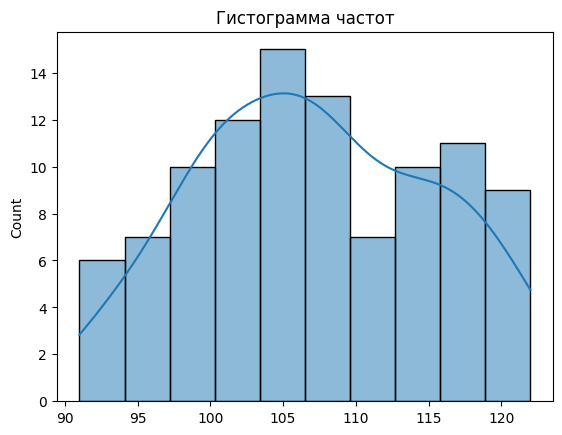

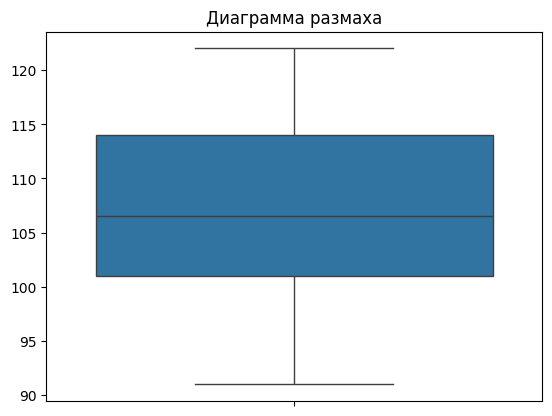

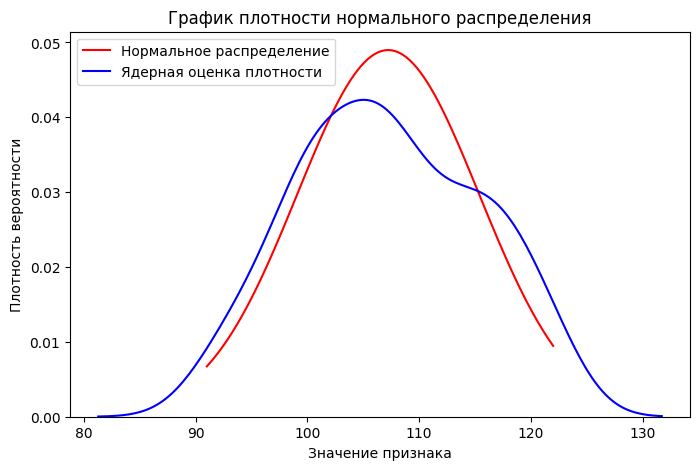

Критерий χ²: p-value=0.014306493701291754
Гипотеза о нормальном распределении отвергается


In [21]:
task_B()